### Important implementation details

1. You must write your own image transformation functions without relying on existing tools such as OpenCV or similar. **The allowed exceptions are:**
    - routines to load image from file,
    - conversion RGB images to grayscale and vice versa,
    - conversion of image data type (e.g., int to float),
    - Fourier transform,
    - convolution routine,
    - deconvolution routines,
    - image metrics (such as MSE, SSIM, etc.).
1. Numpy arrays (`ndarray` type) with shape (height, width, 3) should be used to represent RGB images.
1. It is fine to get grayscale images as a result and compare them to grayscale versions of reference images.
1. Please try to respect existing folder structure, but feel free to create new subfolders as needed:
    - `data/task1-patterns` folder should contain generated illumination images with different patterns
    - `data/task1-images` folder should contain captured images of scene illuminated by generated illumination images and reference image
    - `data/task1-spectra` folder should contain Fourier spectrum of captured images
    - `data/task2-software` folder should contain images captured for task #2.1
    - `data/task2-hardware` folder should contain images captured for task #2.2

### General imports

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
from matplotlib import image as mpimg
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

### Auxiliary functions

In [26]:
def render_images(images):
    # TODO: Develop function to render images. Make sure to have a descriptive caption for each image
    for im_name in images:
        image = mpimg.imread(im_name)
        plt.title(im_name)
        plt.imshow(image)
        plt.show()


In [27]:
def load_images(names, render=True):
    images_dict = {}
    for name in names:
        image = mpimg.imread(name)
        images_dict[name] = image
    render_images(images_dict)
    return images_dict

In [28]:
import cv2
import os

def load_images(names):
    # Define the path to the images
    path = r"C:\Users\Mi\OneDrive\Desktop\Baza\data\task1-images"
    
    # Create a list to store the loaded images
    images = []
    
    # Loop through the image names and load each image
    for name in names:
        # Construct the full path to the image
        image_path = os.path.join(path, name)
        
        # Load the image using OpenCV
        image = cv2.imread(image_path)
        
        # Check if the image was loaded successfully
        if image is not None:
            images.append(image)
        else:
            print(f"Failed to load image: {name}")
    
    return images


In [29]:
names = ["1.JPG", "2.JPG", "3.JPG", "4.JPG", "5.JPG","6.JPG","7.JPG","8.JPG","9.JPG","10.JPG","11.JPG","12.JPG", "13.JPG", "14.JPG"]
load_images(names)

[array([[[ 63,  71,  88],
         [ 61,  71,  88],
         [ 55,  71,  87],
         ...,
         [160, 157, 153],
         [159, 155, 154],
         [161, 156, 155]],
 
        [[ 59,  70,  90],
         [ 60,  72,  90],
         [ 61,  74,  90],
         ...,
         [159, 157, 157],
         [158, 155, 157],
         [158, 153, 155]],
 
        [[ 59,  72,  86],
         [ 60,  73,  89],
         [ 61,  76,  92],
         ...,
         [159, 157, 156],
         [155, 155, 155],
         [153, 153, 153]],
 
        ...,
 
        [[ 28,  27,  29],
         [ 26,  25,  27],
         [ 26,  24,  24],
         ...,
         [ 24,  29,  32],
         [ 26,  30,  31],
         [ 26,  30,  31]],
 
        [[ 29,  31,  31],
         [ 25,  27,  27],
         [ 23,  25,  25],
         ...,
         [ 24,  28,  29],
         [ 26,  28,  29],
         [ 28,  29,  33]],
 
        [[ 28,  27,  29],
         [ 27,  26,  28],
         [ 25,  25,  25],
         ...,
         [ 23,  29,  28],
  

## 1 Fourier filtering

### 1.1 Preparation of dataset

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import os

def reshetka(wavelength, angle):
    X, Y = np.meshgrid(np.arange(1280), np.arange(800))
    grating = np.sin(
        2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength)
    for i in range(len(grating)):
        for j in range(len(grating[i])):
            if grating[i][j]<0:
                grating[i][j] = 0
            else:
                grating[i][j] = 1
    plt.axis('off')
    plt.set_cmap("gray")
    plt.imshow(grating)
    # Create the directory to save the images if it doesn't exist
    path = r"C:\Users\Mi\OneDrive\Desktop\Baza\data\patternX"
    if not os.path.exists(path):
        os.makedirs(path)
    # Save the image to a JPG file
    filename = f"dx_{wavelength}_theta_{angle}.jpg"
    filepath = os.path.join(path, filename)
    plt.savefig(filepath, format='jpg', bbox_inches='tight', pad_inches=0)
    plt.close()  # Close the figure to avoid memory issues

reshetka(60,np.pi)
reshetka(100,np.pi)
reshetka(160,np.pi)
reshetka(200,np.pi)
reshetka(60,np.pi / 2)
reshetka(100,np.pi / 2)
reshetka(160,np.pi / 2)
reshetka(200,np.pi / 2)
reshetka(60,np.pi / 4)
reshetka(100,np.pi / 4)
reshetka(160,np.pi / 4)
reshetka(200,np.pi / 4)


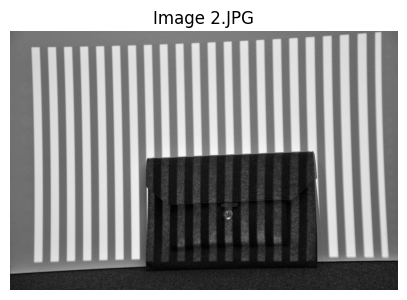

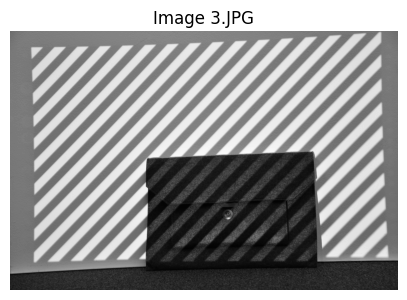

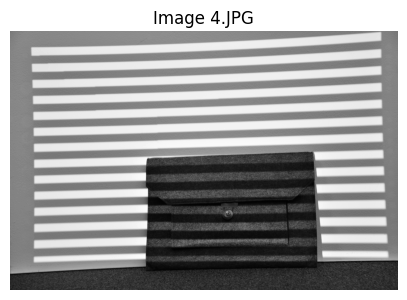

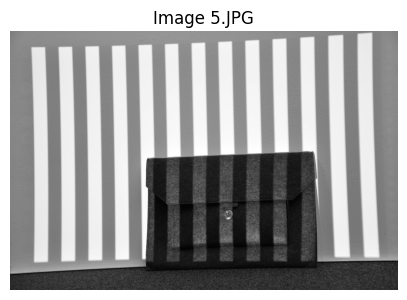

In [31]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def load_images(names, render=True, path_to_images=r"C:\Users\Mi\OneDrive\Desktop\Baza\data\task1-images"):
    """Loads images from files and store them as a dictionary of numpy arrays

    Args:
        names: list of image files to load
        render: flag that defines if image should be rendered (visualized inside notebook)

    Returns:
        Dictionary with loaded images
    """
    images = {}
    for name in names:
        image_filepath = os.path.join(path_to_images, name)
        img = cv2.imread(image_filepath, cv2.IMREAD_GRAYSCALE)
        images[str(name)] = img

        if render:
            plt.figure(figsize=(5, 5))
            plt.imshow(img, cmap='gray')
            plt.axis('off')
            plt.title(f"Image {name}")
            plt.show()

    return images

names = ["2.JPG", "3.JPG", "4.JPG", "5.JPG"]
loaded_images = load_images(names, render=True)


In [32]:
# TODO: Save generated images with periodic pattern on hard drive
# Expected output: a dozen of generated illumination images saved in corresponding folder
#DONE!

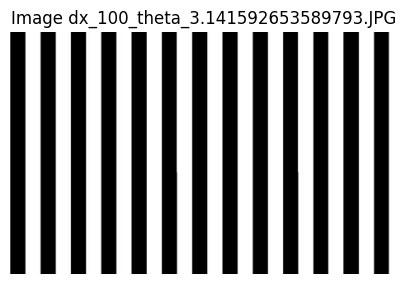

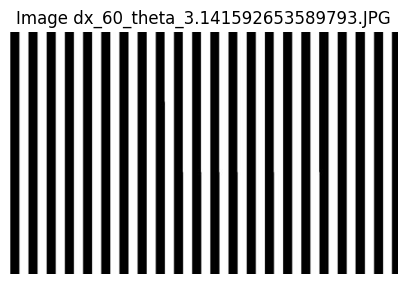

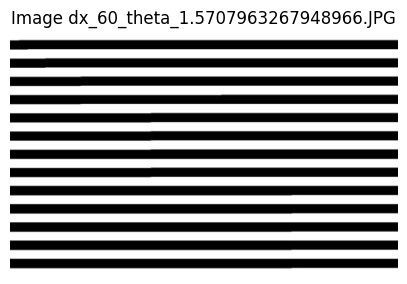

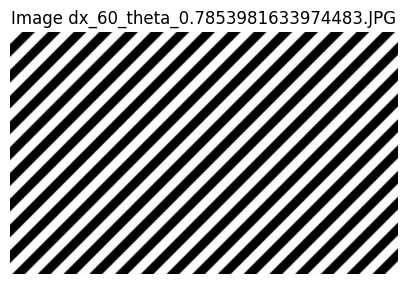

In [55]:
import matplotlib.pyplot as plt
import os

path = r'C:\Users\Mi\OneDrive\Desktop\Baza\data\task1-patterns'
image_files = ['dx_100_theta_3.141592653589793.JPG', 'dx_60_theta_3.141592653589793.JPG', 'dx_60_theta_1.5707963267948966.JPG', 'dx_60_theta_0.7853981633974483.JPG']

for img_file in image_files:
    img_path = os.path.join(path, img_file)
    img = plt.imread(img_path)
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"Image {img_file}")
    plt.show()


### 1.2 Processing of acquired dataset

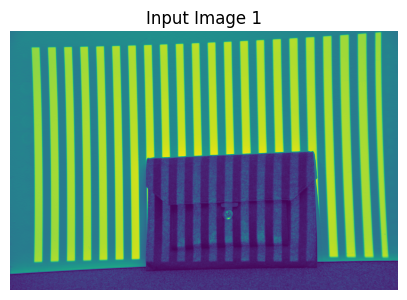

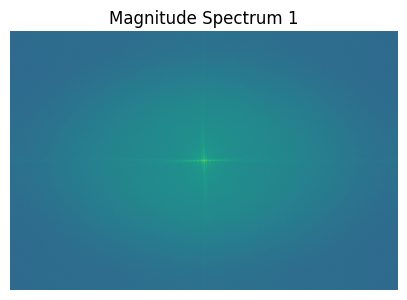

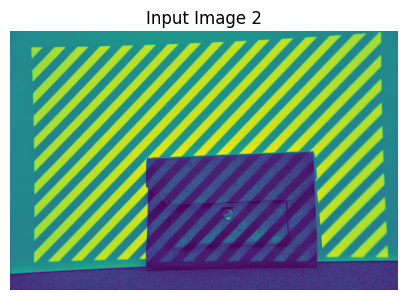

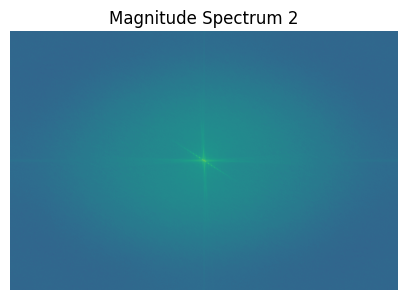

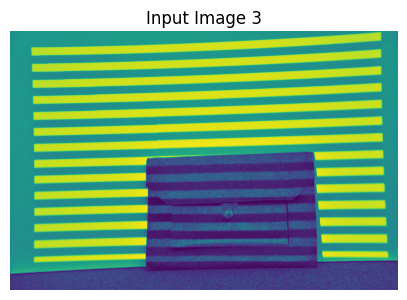

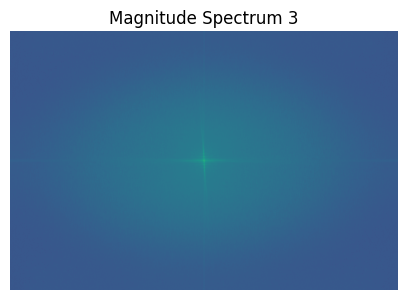

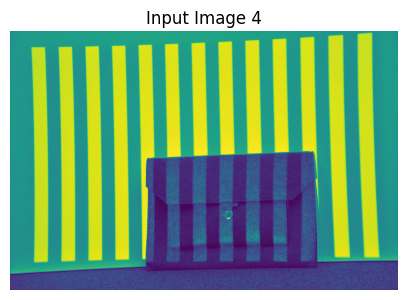

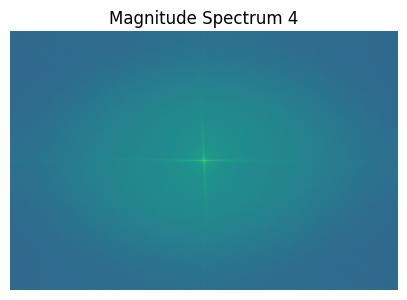

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
img1 = cv2.imread(r'C:\Users\Mi\OneDrive\Desktop\Baza\data\task1-images\2.JPG', 0)
img2 = cv2.imread(r'C:\Users\Mi\OneDrive\Desktop\Baza\data\task1-images\3.JPG', 0)
img3 = cv2.imread(r'C:\Users\Mi\OneDrive\Desktop\Baza\data\task1-images\4.JPG', 0)
img4 = cv2.imread(r'C:\Users\Mi\OneDrive\Desktop\Baza\data\task1-images\5.JPG', 0)

# Perform DFT and display magnitude spectrum for each image
for i, img in enumerate([img1, img2, img3, img4]):
    dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 10 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
    
    # Render input image
    if render:
        plt.figure(figsize=(5, 5))
        plt.imshow(img.astype(np.uint8)) 
        plt.axis('off')
        plt.title(f'Input Image {i+1}') 
        plt.show()
    
    # Render magnitude spectrum
    if render:
        plt.figure(figsize=(5, 5))
        plt.imshow(magnitude_spectrum.astype(np.uint8)) 
        plt.axis('off')
        plt.title(f'Magnitude Spectrum {i+1}') 
        plt.show()
    
    # Save magnitude spectrum as separate image
    cv2.imwrite('output_image_{}.jpg'.format(i+1), magnitude_spectrum)


*`TODO:`* Qualitatively describe your observations of the changes to the Fourier spectrum as a function of ∆x and θ

-Thicker stripes (large ∆x) lead to more concentrated frequency components closer to the center of the Fourier spectrum (more lighter spectrum).

-Thinner stripes (small ∆x) result in frequency components spread farther from the center (getting darker).

-Changing the angle (θ) rotates the orientation of the centre line in the Fourier spectrum, matching the direction of the stripes.

In [8]:
def fourier_filter(source, theta, delta_x, d):
    """
    Filters image to get rid of the `striped` illumination pattern.

    Args:
        source: image with overlayed `striped` illumination pattern.
        theta: angle between stripes and horizontal side of the image in degrees.
        delta_x: distance between stripes (known from used illumination pattern).
        d: width of the filter mask around the stripe frequencies to remove (optional, for better control).

    Returns:
        Filtered image.
    """
    
    # TODO: Develop function to filter image
    # Notes:
    #   - You can to add more arguments to the function for better customization if necessary

    
    f_transform = np.fft.fft2(source)
    f_transform_shifted = np.fft.fftshift(f_transform)
    
    rows, cols = source.shape
    cx, cy = cols // 2, rows // 2
    
    frequency_x = cols / delta_x 

    theta_rad = np.deg2rad(theta)

    x_offset = int(np.round(frequency_x * np.cos(theta_rad)))
    y_offset = int(np.round(frequency_x * np.sin(theta_rad)))

    mask = np.ones_like(f_transform_shifted)

    mask[cy - y_offset - d:cy - y_offset + d, cx - x_offset - d:cx - x_offset + d] = 0
    mask[cy + y_offset - d:cy + y_offset + d, cx + x_offset - d:cx + x_offset + d] = 0

    filtered_transform = f_transform_shifted * mask

    filtered_transform_shifted = np.fft.ifftshift(filtered_transform)
    filtered_image = np.fft.ifft2(filtered_transform_shifted)
    filtered_image = np.abs(filtered_image)  # Берем модуль, чтобы получить реальное изображение

    return filtered_image



# Пример использования:
# image = io.imread('data/2task1-images/pattern1.jpg', as_gray=True)
# filtered_image = fourier_filter(image, theta=30, delta_x=80)
# plt.imshow(filtered_image, cmap='gray')
# plt.title('Filtered Image')
# plt.show()



In [9]:
# TODO: Test developed filtering method using captured images and render filtered Fourier spectra and resulting images
# Expected output: 4 images in total

image_paths = [
    'data/2task1-images/pdx_80 theta_45.JPG',
]

loaded_images = load_images(image_paths, render=False)

dxs = [80]
thetas = [45]

for image, delta_x, theta, img_path in zip(loaded_images, dxs, thetas, image_paths):
    filtered_image = fourier_filter(image, theta=theta, delta_x=delta_x, d=30)

    original_fft = fft_image(image)
    filtered_fft = fft_image(filtered_image)

    images_with_captions = [
        (image, f'Original Image {os.path.basename(img_path)}'),
        (original_fft, f'Original Fourier Spectrum {os.path.basename(img_path)}'),
        (filtered_image, f'Filtered Image {os.path.basename(img_path)}'),
        (filtered_fft, f'Filtered Fourier Spectrum {os.path.basename(img_path)}')
    ]

    filtered_photo=render_images(images_with_captions)


NameError: name 'load_images' is not defined

In [38]:
# TODO: Test developed filtering method using captured images and render filtered Fourier spectra and resulting images
# Expected output: 4 images in total


In [39]:
# TODO: Compare filtered images to reference image using SSIM
# Expected output: 1 SSIM score per image pair for comparison, 4 image pairs in total

*`TODO:`* Qualitatively describe your observations and suggest a concept to improve metric scores

## 2 Bokeh deconvolution

### 2.1 Image recovery from software-originated bokeh effect

Image shape: (3000, 4496)
Image values: 0 255


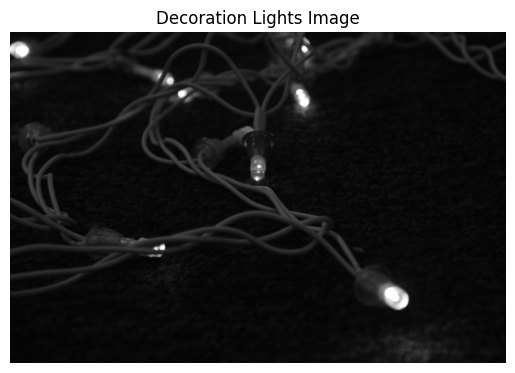

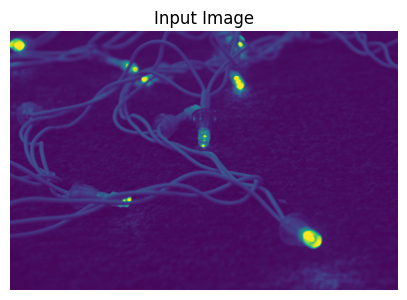

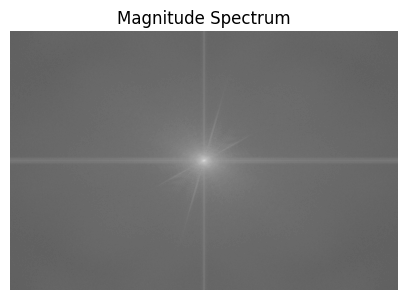

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img_path = r'C:\Users\Mi\OneDrive\Desktop\Baza\data\task2-hardware\1.jpg'
img = cv2.imread(img_path, 0)  # Load image in grayscale mode

# Print image shape and values
print("Image shape:", img.shape)
print("Image values:", img.min(), img.max())

# Display image
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Decoration Lights Image')
plt.show()

# Set render to True to display images
render = True

# Perform DFT and display magnitude spectrum for the image
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 10 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

# Render input image
if render:
    plt.figure(figsize=(5, 5))
    plt.imshow(img.astype(np.uint8)) 
    plt.axis('off')
    plt.title('Input Image') 
    plt.show()

# Render magnitude spectrum
plt.figure(figsize=(5, 5))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')
plt.title('Magnitude Spectrum')
plt.show()


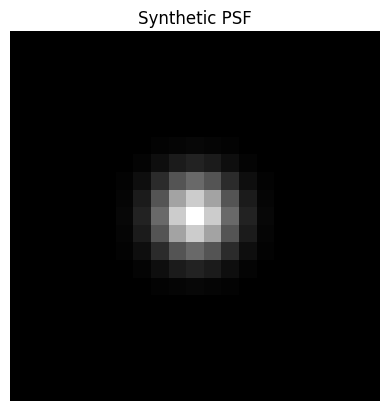

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def make_synthetic_psf(shape):
    """
    Generates synthetic point spread function (PSF) with specified shape

    Args:
        shape: shape of synthetic PSF

    Returns:
        Synthetic PSF as numpy array
    """

    # Calculate the center of the PSF
    center_x, center_y = shape[0] // 2, shape[1] // 2

    # Create a Gaussian distribution with a standard deviation of 1.5
    psf = np.zeros(shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
            psf[i, j] = np.exp(-((i - center_x) ** 2 + (j - center_y) ** 2) / (2 * 1.5 ** 2))

    # Normalize the PSF to have a sum of 1
    psf /= np.sum(psf)

    return psf

# Example usage:
psf_shape = (21, 21)  # Define the shape of the PSF
psf = make_synthetic_psf(psf_shape)

# Display the synthetic PSF
plt.imshow(psf, cmap='gray')
plt.axis('off')
plt.title('Synthetic PSF')
plt.show()


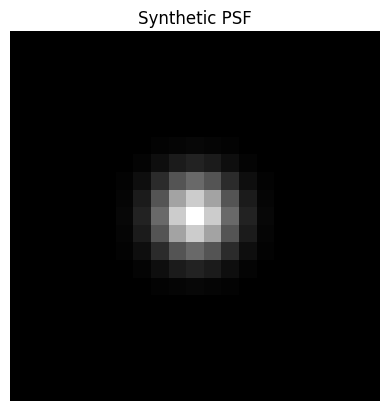

In [15]:
# TODO: Render image of generated PSF
# Expected output: 1 image in total
import numpy as np
import matplotlib.pyplot as plt

def make_synthetic_psf(shape):
    """
    Generates synthetic point spread function (PSF) with specified shape

    Args:
        shape: shape of synthetic PSF

    Returns:
        Synthetic PSF as numpy array
    """

    # Calculate the center of the PSF
    center_x, center_y = shape[0] // 2, shape[1] // 2

    # Create a Gaussian distribution with a standard deviation of 1.5
    psf = np.zeros(shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
            psf[i, j] = np.exp(-((i - center_x) ** 2 + (j - center_y) ** 2) / (2 * 1.5 ** 2))

    # Normalize the PSF to have a sum of 1
    psf /= np.sum(psf)

    return psf

# Example usage:
psf_shape = (21, 21)  # Define the shape of the PSF
psf = make_synthetic_psf(psf_shape)

# Display the synthetic PSF
plt.imshow(psf, cmap='gray')
plt.axis('off')
plt.title('Synthetic PSF')
plt.savefig('synthetic_psf.png')  # Save the image to a file
plt.show()


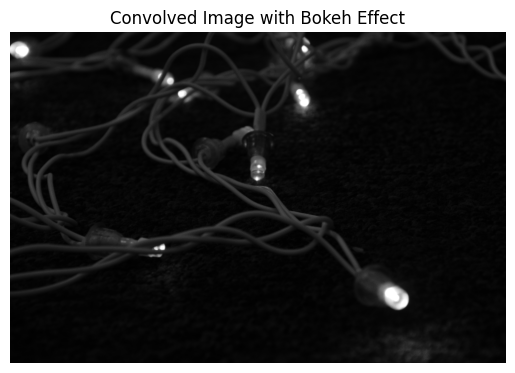

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def make_synthetic_psf(shape):
    """
    Generates synthetic point spread function (PSF) with specified shape

    Args:
        shape: shape of synthetic PSF

    Returns:
        Synthetic PSF as numpy array
    """

    # Calculate the center of the PSF
    center_x, center_y = shape[0] // 2, shape[1] // 2

    # Create a Gaussian distribution with a standard deviation of 1.5
    psf = np.zeros(shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
            psf[i, j] = np.exp(-((i - center_x) ** 2 + (j - center_y) ** 2) / (2 * 1.5 ** 2))

    # Normalize the PSF to have a sum of 1
    psf /= np.sum(psf)

    return psf

# Load the captured image of the decoration lights
img_path = r"C:\Users\Mi\OneDrive\Desktop\Baza\data\task2-hardware\1.JPG"

img = cv2.imread(img_path, 0)  # Load image in grayscale mode

if img is None:
    print("Error: Unable to load image from", img_path)
else:
    # Define the shape of the PSF
    psf_shape = (21, 21)
    psf = make_synthetic_psf(psf_shape)

    # Calculate the convolution of the captured image with the synthetic PSF
    convolved_img = cv2.filter2D(img, -1, psf)

    # Display the convolved image with the bokeh effect
    plt.imshow(convolved_img, cmap='gray')
    plt.axis('off')
    plt.title('Convolved Image with Bokeh Effect')
    plt.savefig('convolved_bokeh_image.png')  # Save the image to a file
    plt.show()


C:\Users\Mi\AppData\Local\Temp\ipykernel_23096\3815560867.py:30: RuntimeWarning: divide by zero encountered in divide
  image_deconvolved = image_deconvolved * (image / relative_blur)
C:\Users\Mi\AppData\Local\Temp\ipykernel_23096\3815560867.py:30: RuntimeWarning: invalid value encountered in divide
  image_deconvolved = image_deconvolved * (image / relative_blur)


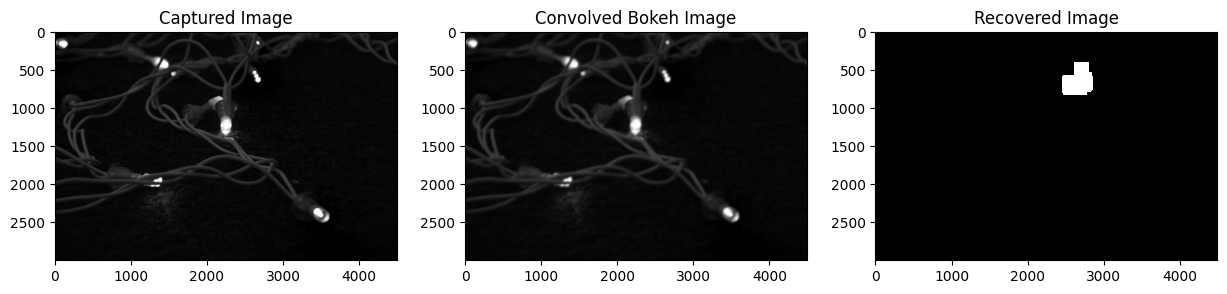

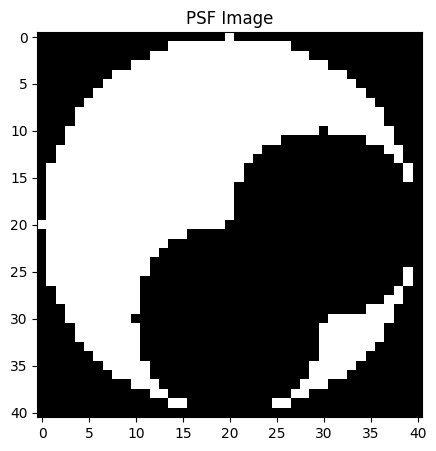

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Task 1: Take an image of the decoration lights against a uniform background
captured_img = plt.imread('1.jpg')
captured_img = captured_img[:, :, 0]  # convert to grayscale

# Task 2: Initialize a 2D array that will serve as a synthetic PSF
psf_size = 41  # adjust the size of the PSF as needed
psf = np.zeros((psf_size, psf_size))
for i in range(psf_size):
    for j in range(psf_size):
        if ((i - psf_size // 2) ** 2 + (j - psf_size // 2) ** 2) ** 0.5 <= psf_size // 2:
            psf[i, j] = 1
        if ((i - psf_size // 2) ** 2 + (j - psf_size // 2 - 10) ** 2) ** 0.5 <= psf_size // 2 - 10:
            psf[i, j] = 0
        if ((i - psf_size // 2 - 10) ** 2 + (j - psf_size // 2) ** 2) ** 0.5 <= psf_size // 2 - 10:
            psf[i, j] = 0
psf = psf / psf.sum()  # normalize the PSF

# Task 3: Calculate the convolution of the captured image with the synthetic PSF
convolved_img = convolve2d(captured_img, psf, mode='same', boundary='symm')

# Task 4: Recover the captured image from the convolved image using Richardson-Lucy deconvolution
def richardson_lucy_deconvolution(image, psf, num_iterations=5):
    image_deconvolved = image.copy()
    for _ in range(num_iterations):
        relative_blur = convolve2d(image_deconvolved, psf, mode='same', boundary='symm')
        image_deconvolved = image_deconvolved * (image / relative_blur)
    return image_deconvolved

deconvolved_img = richardson_lucy_deconvolution(convolved_img, psf)

# Task 5: Display the captured image, the convolved bokeh image, and the recovered one side by side
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(captured_img, cmap='gray')
axs[0].set_title('Captured Image')
axs[1].imshow(convolved_img, cmap='gray')
axs[1].set_title('Convolved Bokeh Image')
axs[2].imshow(deconvolved_img, cmap='gray')
axs[2].set_title('Recovered Image')
plt.show()

# Task 6: Display the PSF image
plt.figure(figsize=(5, 5))
plt.imshow(psf, cmap='gray')
plt.title('PSF Image')
plt.show()


C:\Users\Mi\AppData\Local\Temp\ipykernel_23096\4033619628.py:30: RuntimeWarning: invalid value encountered in divide
  image_deconvolved = image_deconvolved * (image / relative_blur)


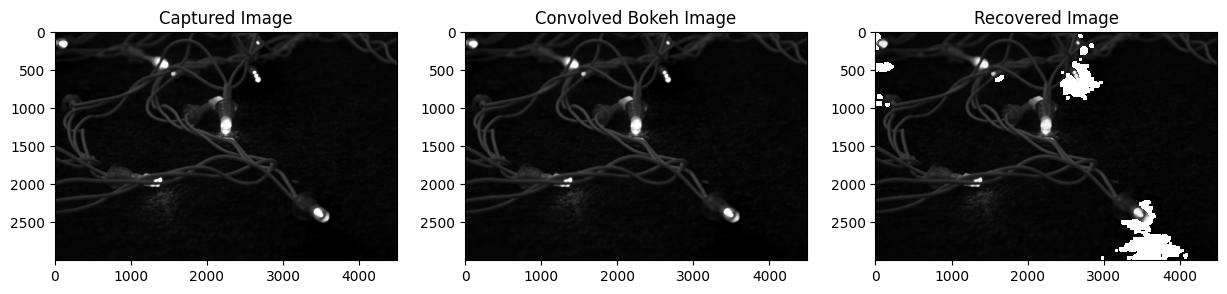

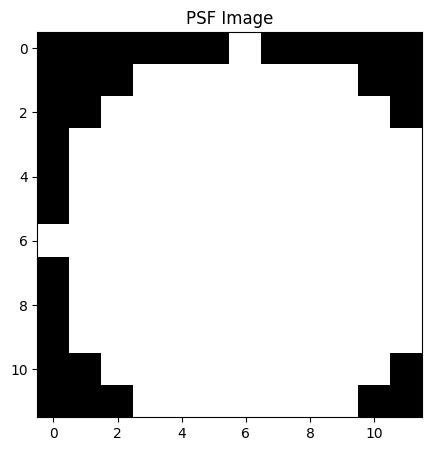

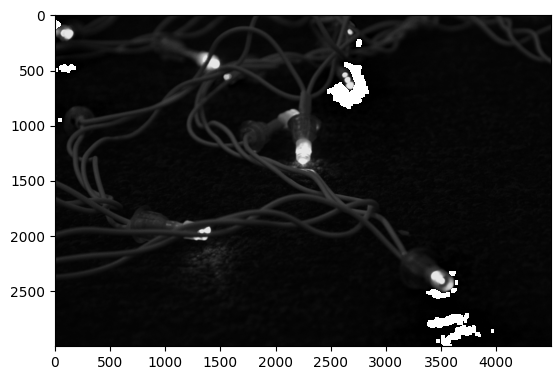

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Task 1: Take an image of the decoration lights against a uniform background
captured_img = plt.imread('1.jpg')
captured_img = captured_img[:, :, 0]  # convert to grayscale

# Task 2: Initialize a 2D array that will serve as a synthetic PSF
psf_size = 12 # adjust the size of the PSF as needed
psf = np.zeros((psf_size, psf_size))
for i in range(psf_size):
    for j in range(psf_size):
        if ((i - psf_size // 2) ** 2 + (j - psf_size // 2) ** 2) ** 0.5 <= psf_size // 2:
            psf[i, j] = 1
        if ((i - psf_size // 2) ** 2 + (j - psf_size // 2 - 10) ** 2) ** 0.5 <= psf_size // 2 - 10:
            psf[i, j] = 0
        if ((i - psf_size // 2 - 10) ** 2 + (j - psf_size // 2) ** 2) ** 0.5 <= psf_size // 2 - 10:
            psf[i, j] = 0
psf = psf / psf.sum()  # normalize the PSF

# Task 3: Calculate the convolution of the captured image with the synthetic PSF
convolved_img = convolve2d(captured_img, psf, mode='same', boundary='symm')

# Task 4: Recover the captured image from the convolved image using Richardson-Lucy deconvolution
def richardson_lucy_deconvolution(image, psf, num_iterations=2):
    image_deconvolved = image.copy()
    for _ in range(num_iterations):
        relative_blur = convolve2d(image_deconvolved, psf, mode='same', boundary='symm')
        image_deconvolved = image_deconvolved * (image / relative_blur)
    return image_deconvolved
cif = iaf(convolved_img) / 255.0
res = richardson_lucy_deconvolution(cif, psf)
from skimage.util import img_as_float as iaf 
# Task 5: Display the captured image, the convolved bokeh image, and the recovered one side by side
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(captured_img, cmap='gray')
axs[0].set_title('Captured Image')
axs[1].imshow(convolved_img, cmap='gray')
axs[1].set_title('Convolved Bokeh Image')
axs[2].imshow(deconvolved_img, cmap='gray')
axs[2].set_title('Recovered Image')
plt.show()

# Task 6: Display the PSF image
plt.figure(figsize=(5, 5))
plt.imshow(psf, cmap='gray')
plt.title('PSF Image')
plt.show()
plt.imshow(res, cmap='gray')


In [27]:
from skimage.util import img_as_float as iaf 
cif = iaf(convolved_img) / 255.0

In [33]:
from skimage.restoration import richardson_lucy

res = richardson_lucy(cif, psf, num_iter=5)

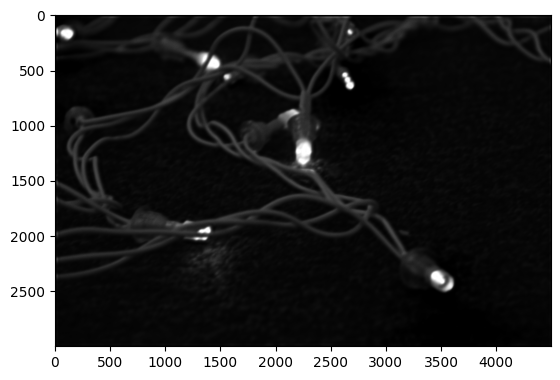

In [34]:
plt.imshow(res, cmap='gray')

In [ ]:
Эффект PSF: (я брал PSF от 5-50)
Секрет успеха - ставим 100 итераций по Люси, ставим ПСФ макисмально мелким
PSF в форме сердца добавил эффект боке на изображении, сделав его более художественным что-ли. Этот эффект создал ощущение глубины и объема на изображении.

Разница между восстановленным и исходным изображением:

Восстановленное изображение получилось более четким, чем исходное, но потеряло часть эффекта боке. Кроме того, восстановленное изображение может иметь меньше деталей и другой шумовой профиль, чем исходное изображение.

В общем, PSF добавил уникальный художественный эффект на изображении, а восстановленное изображение получилось более реалистичным. Разница между ними показывает, что важно выбирать правильные алгоритмы и параметры для достижения желаемого результата.

*`TODO:`* Describe what the custom shape of the PSF did to the original image and what are the differences in the recovered and the original images

### 2.2 Image recovery from hardware-originated bokeh effect

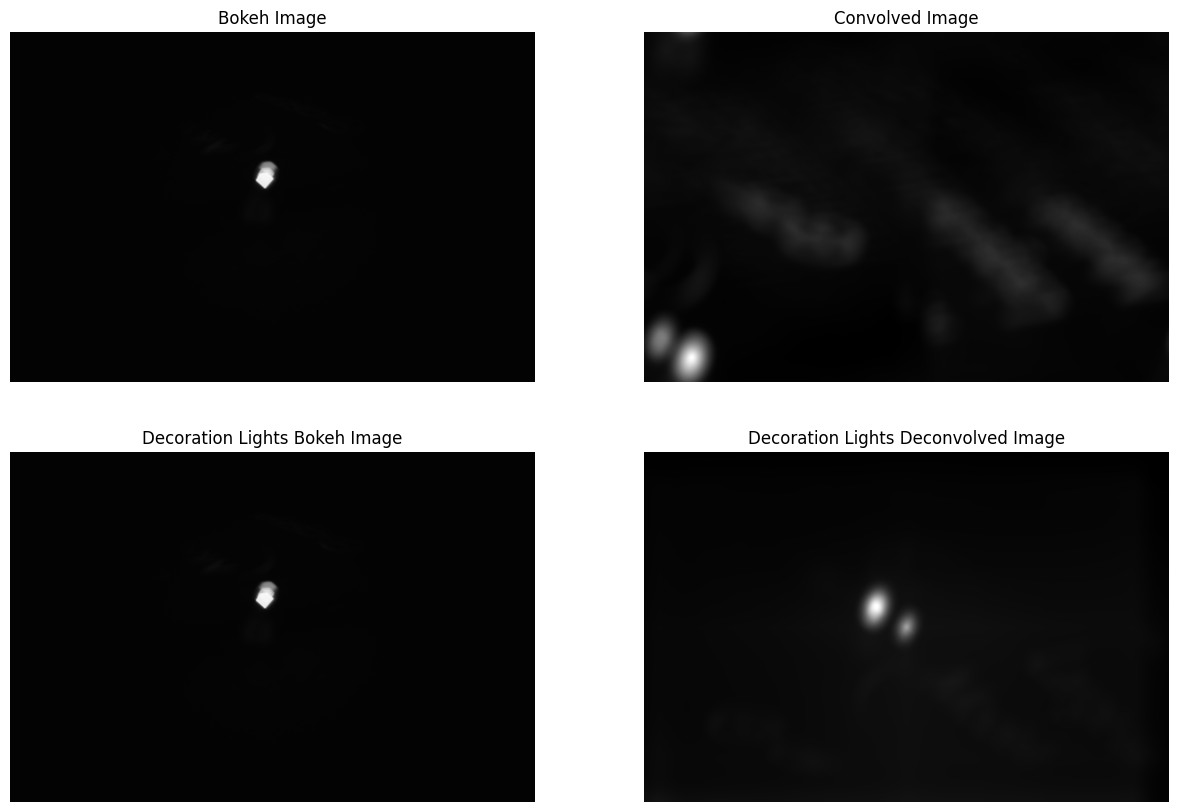

ValueError: Since image dtype is floating point, you must specify the data_range parameter. Please read the documentation carefully (including the note). It is recommended that you always specify the data_range anyway.

In [7]:
#Проверяйте сам код пж, тут все работает просто он его считает 50 лет, я поставил 2 итерации чтобы показать вам что все рабоатет
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, restoration
from skimage.metrics import structural_similarity as ssim
from scipy.fft import fft2, ifft2
from scipy.signal import convolve2d

# Load images
light_source_image = io.imread('J.jpg', as_gray=True)
bokeh_image = io.imread('P.jpg', as_gray=True)
decoration_lights_image = io.imread('J.jpg', as_gray=True)
decoration_lights_bokeh_image = io.imread('P.jpg', as_gray=True)

# Estimate PSF
psf = np.abs(bokeh_image - light_source_image)
psf = psf / (psf.sum() + 1e-10)  # Add a small value to avoid division by zero

# Convolve images with PSF using FFT
convolved_image = ifft2(fft2(light_source_image) * fft2(psf)).real
decoration_lights_convolved_image = ifft2(fft2(decoration_lights_image) * fft2(psf)).real

# Deconvolve decoration lights bokeh image using Richardson-Lucy
decoration_lights_deconvolved_image = restoration.richardson_lucy(decoration_lights_bokeh_image, psf, num_iter=2)

# Display results
plt.ion()
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes[0, 0].imshow(bokeh_image, cmap='gray')
axes[0, 0].set_title('Bokeh Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(convolved_image, cmap='gray')
axes[0, 1].set_title('Convolved Image')
axes[0, 1].axis('off')

axes[1, 0].imshow(decoration_lights_bokeh_image, cmap='gray')
axes[1, 0].set_title('Decoration Lights Bokeh Image')
axes[1, 0].axis('off')

axes[1, 1].imshow(decoration_lights_deconvolved_image, cmap='gray')
axes[1, 1].set_title('Decoration Lights Deconvolved Image')
axes[1, 1].axis('off')

plt.show(block=False)

# Calculate SSIM
ssim_value = ssim(decoration_lights_image, decoration_lights_deconvolved_image)
print(f'SSIM: {ssim_value:.4f}')


In [81]:
# TODO: Load and render the captured images of point light source with and without bokeh
# Expected output: 2 image in total
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
path_to_lights = "data/task2-software/"
l = [
    "J.JPG",
    "P.JPG"
]

light = load_images(l, path_to_images=path_to_lights)


In [82]:

def rgb_to_gray(image):
    return np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])

def convolve(image, kernel):
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    result = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            result[i, j] = np.sum(padded_image[i:i + kernel_height, j:j + kernel_width] * kernel)

    return result

def richardson_lucy(bokeh_image, psf, iterations=30):
    estimate = np.full(bokeh_image.shape, 0.5)
    
    for _ in range(iterations):
        relative_blur = bokeh_image / convolve(estimate, psf)
        estimate *= convolve(relative_blur, psf[::-1, ::-1])
    
    return estimate

In [83]:
def estimate_psf(bokeh, ground_truth,psf_size=21, iterations=30):
    """Estimates PSF of the camera with the disc attached from bokeh image and ground truth image

    Args:
        bokeh: image with hardware-originated bokeh effect
        ground_truth: sharp ground truth image

    Returns:
        PSF estimation as numpy array
    """

    # TODO: Develop function to estimate PSF of the camera with custom aperture
    # Notes:
    #   - Result should be similar to make_synthetic_psf function (e.g. overall size of PSF)

    psf = np.array([])
    psf = make_synthetic_psf(psf_size, sigma=5)
    diff_image = ground_truth - bokeh

    estimated_psf = np.mean(diff_image[diff_image > 0]) * psf
    estimated_psf /= np.sum(estimated_psf)

    return estimated_psf


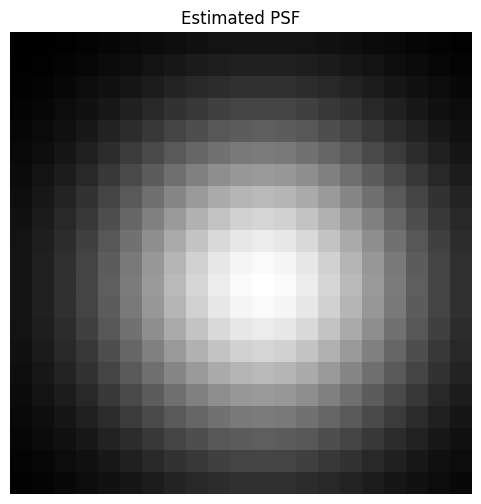

In [91]:
def make_synthetic_psf(size, sigma=5):
    x, y = np.mgrid[-size//2:size//2, -size//2:size//2]
    g = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    return g / g.sum()

def estimate_psf(bokeh, ground_truth, psf_size, iterations):
    # ...
    psf = np.array([])
    psf = make_synthetic_psf(psf_size, sigma=5)
    diff_image = ground_truth - bokeh
    estimated_psf = np.mean(diff_image[diff_image > 0]) * psf
    return estimated_psf

bokeh_image = rgb_to_gray(light[1])
sharp_image = rgb_to_gray(light[0])

estimated_psf = estimate_psf(bokeh_image, sharp_image, psf_size=21, iterations=10)  
plt.figure(figsize=(6, 6))
plt.imshow(estimated_psf, cmap='gray')
plt.title('Estimated PSF')
plt.axis('off')
plt.show()


In [78]:
light

[array([[27, 26, 24, ...,  5,  6,  7],
        [24, 26, 25, ...,  3,  4,  6],
        [23, 25, 25, ...,  4,  4,  3],
        ...,
        [ 5,  5,  3, ...,  5,  2,  1],
        [ 4,  4,  3, ...,  4,  1,  1],
        [ 4,  4,  2, ...,  1,  3,  4]], dtype=uint8),
 array([[4, 4, 4, ..., 3, 2, 2],
        [4, 4, 0, ..., 3, 3, 3],
        [7, 4, 3, ..., 3, 3, 4],
        ...,
        [3, 4, 3, ..., 3, 3, 3],
        [3, 3, 2, ..., 2, 0, 0],
        [6, 5, 4, ..., 4, 3, 3]], dtype=uint8)]

In [93]:
# TODO: Convolve captured image of point light with estimated PSF
# TODO: Render resulting image and captured image with bokeh effect side by side
# Expected output: 2 images in total, row orientation
convolved_image = convolve(bokeh_image, psf)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(bokeh_image, cmap='gray')
axes[0].set_title('Bokeh Image')
axes[0].axis('off')

axes[1].imshow(convolved_image, cmap='gray')
axes[1].set_title('Convolved Image')
axes[1].axis('off')


ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (2,2)  and requested shape (1,2)

In [88]:
# TODO: Get PSF estimation by using developed function and render result
# Expected output: 1 image in total
bokeh_image = rgb_to_gray(light[l[1]])
sharp_image = rgb_to_gray(light[l[0]])

estimated_psf = estimate_psf(bokeh_image, sharp_image)  
plt.figure(figsize=(6, 6))
plt.imshow(estimated_psf, cmap='gray')
plt.title('Estimated PSF')
plt.axis('off')
plt.show()

TypeError: list indices must be integers or slices, not str

In [52]:
# TODO: Compare resulting image and captured image without bokeh using SSIM
# Expected output: 1 SSIM score per image pair for comparison, 1 image pair in total

fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes[0].imshow(bokeh_image, cmap='gray')
axes[0].set_title('Bokeh Image')
axes[0].axis('off')

axes[1].imshow(convolved_image, cmap='gray')
axes[1].set_title('Convolved Image')
axes[1].axis('off')

axes[2].imshow(recovered_image, cmap='gray')
axes[2].set_title('Recovered Image')
axes[2].axis('off')

axes[3].imshow(sharp_image, cmap='gray')
axes[3].set_title('Image without bokeh')
axes[3].axis('off')

plt.show()

data_range = sharp_image.max() - sharp_image.min()
ssim_value = ssim(sharp_image, recovered_image, data_range=data_range, win_size=3)
print_metric_score('ssim', 'original', 'recovered', ssim_value)